# Dataframe Nº Compraventa de viviendas Registradas

**El objetivo de este proyecto es modelar, limpiar y analizar los datos que van a ser útiles para el analisis final. Y convertirlo en un solo dataframe.**

Lo primero que vamos a realizar es cargar las librerias que vamos a utilizar. Y cargar los datasets que tenemos en formato cvs. Número de compraventa de viviendas registradas (2018,2019,2020,2021,2022).

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as g

import warnings
warnings.filterwarnings("ignore")

df_1 = pd.read_csv("2018_comp_vend_hab_trim.csv")
df_2 = pd.read_csv("2019_comp_vend_hab_trim.csv")
df_3 = pd.read_csv("2020_comp_vend_hab_trim.csv")
df_4 = pd.read_csv("2021_comp_vend_hab_trim_A.csv")
df_5 = pd.read_csv("2022_comp_vend_hab_trim.csv")

**Dataset df_1 año 2018**

In [221]:
df_1

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compravendes,Nombre
0,2018,1,1,Ciutat Vella,1,el Raval,Habitatge nou lliure,1
1,2018,1,1,Ciutat Vella,2,el Barri Gòtic,Habitatge nou lliure,6
2,2018,1,1,Ciutat Vella,3,la Barceloneta,Habitatge nou lliure,7
3,2018,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Habitatge nou lliure,6
4,2018,1,2,Eixample,5,el Fort Pienc,Habitatge nou lliure,0
...,...,...,...,...,...,...,...,...
883,2018,4,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,64
884,2018,4,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,5
885,2018,4,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,50
886,2018,4,10,Sant Martí,73,la Verneda i la Pau,Habitatge usat,70


In [281]:
import pandas as pd

# Verificar si hay NaN en el DataFrame
hay_nan = df_1.isna().any().any()

if hay_nan:
    # Sustituir los NaN por 0
    df_1 = df_1.fillna(0)
    print("Se han sustituido los NaN por 0 en el DataFrame.")
else:
    print("No se encontraron NaN en el DataFrame.")


No se encontraron NaN en el DataFrame.


Primero vamos a convertir los datos de la columna 'Compravendes' en columnas, y añadiremos una nueva columna que sume el total de compravendes por barrio.

In [282]:
#Utilizar pivot_table para convertir los valores de 'Compravendes' en columnas
df_pivot = pd.pivot_table(df_1, index=['Any', 'Trimestre', 'Nom_Barri'], columns='Compravendes', values='Nombre').reset_index()

# Restablecer el índice sin incluir el nombre de columna "Compravendes"
df_pivot = df_pivot.rename_axis(None, axis=1)

# Agregar una columna 'Total vendes' que sume cada fila
df_pivot['Total vendes'] = df_pivot[['Habitatge nou lliure', 'Habitatge nou protegit', 'Habitatge usat']].sum(axis=1)

print(df_pivot)


      Any  Trimestre                      Nom_Barri  Habitatge nou lliure  \
0    2018          1                  Baró de Viver                     0   
1    2018          1                       Can Baró                     0   
2    2018          1                    Can Peguera                     0   
3    2018          1                      Canyelles                     0   
4    2018          1               Ciutat Meridiana                     0   
..    ...        ...                            ...                   ...   
291  2018          4  la Vila Olímpica del Poblenou                     0   
292  2018          4              la Vila de Gràcia                     4   
293  2018          4                      les Corts                    17   
294  2018          4                   les Roquetes                     0   
295  2018          4                les Tres Torres                     0   

     Habitatge nou protegit  Habitatge usat  Total vendes  
0              

Ahora vamos a sumar los datos de cada trimestre por barrio con el fin de dejar una unica fila por barrio, la cual tendrá el valor del año.

In [283]:
# Sumar los datos de cada trimestre para cada barrio y eliminar la columna "Trimestre"
df_1_sum = df_pivot.groupby(['Any', 'Nom_Barri']).sum().reset_index().drop('Trimestre', axis=1)

print(df_1_sum)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2018                  Baró de Viver                     0   
1   2018                       Can Baró                     0   
2   2018                    Can Peguera                     0   
3   2018                      Canyelles                     0   
4   2018               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2018  la Vila Olímpica del Poblenou                     0   
70  2018              la Vila de Gràcia                    29   
71  2018                      les Corts                    39   
72  2018                   les Roquetes                     0   
73  2018                les Tres Torres                     1   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              23            23  
1                        0              99            99  
2                        0               7

In [284]:
# Eliminar las filas donde el valor de "Nom_Barri" sea igual a "No consta"
df_1_sum = df_1_sum[df_1_sum['Nom_Barri'] != 'No consta']

print(df_1_sum)


     Any                      Nom_Barri  Habitatge nou lliure  \
0   2018                  Baró de Viver                     0   
1   2018                       Can Baró                     0   
2   2018                    Can Peguera                     0   
3   2018                      Canyelles                     0   
4   2018               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2018  la Vila Olímpica del Poblenou                     0   
70  2018              la Vila de Gràcia                    29   
71  2018                      les Corts                    39   
72  2018                   les Roquetes                     0   
73  2018                les Tres Torres                     1   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              23            23  
1                        0              99            99  
2                        0               7

A continuación crearemos un histograma para visualizar los datos.

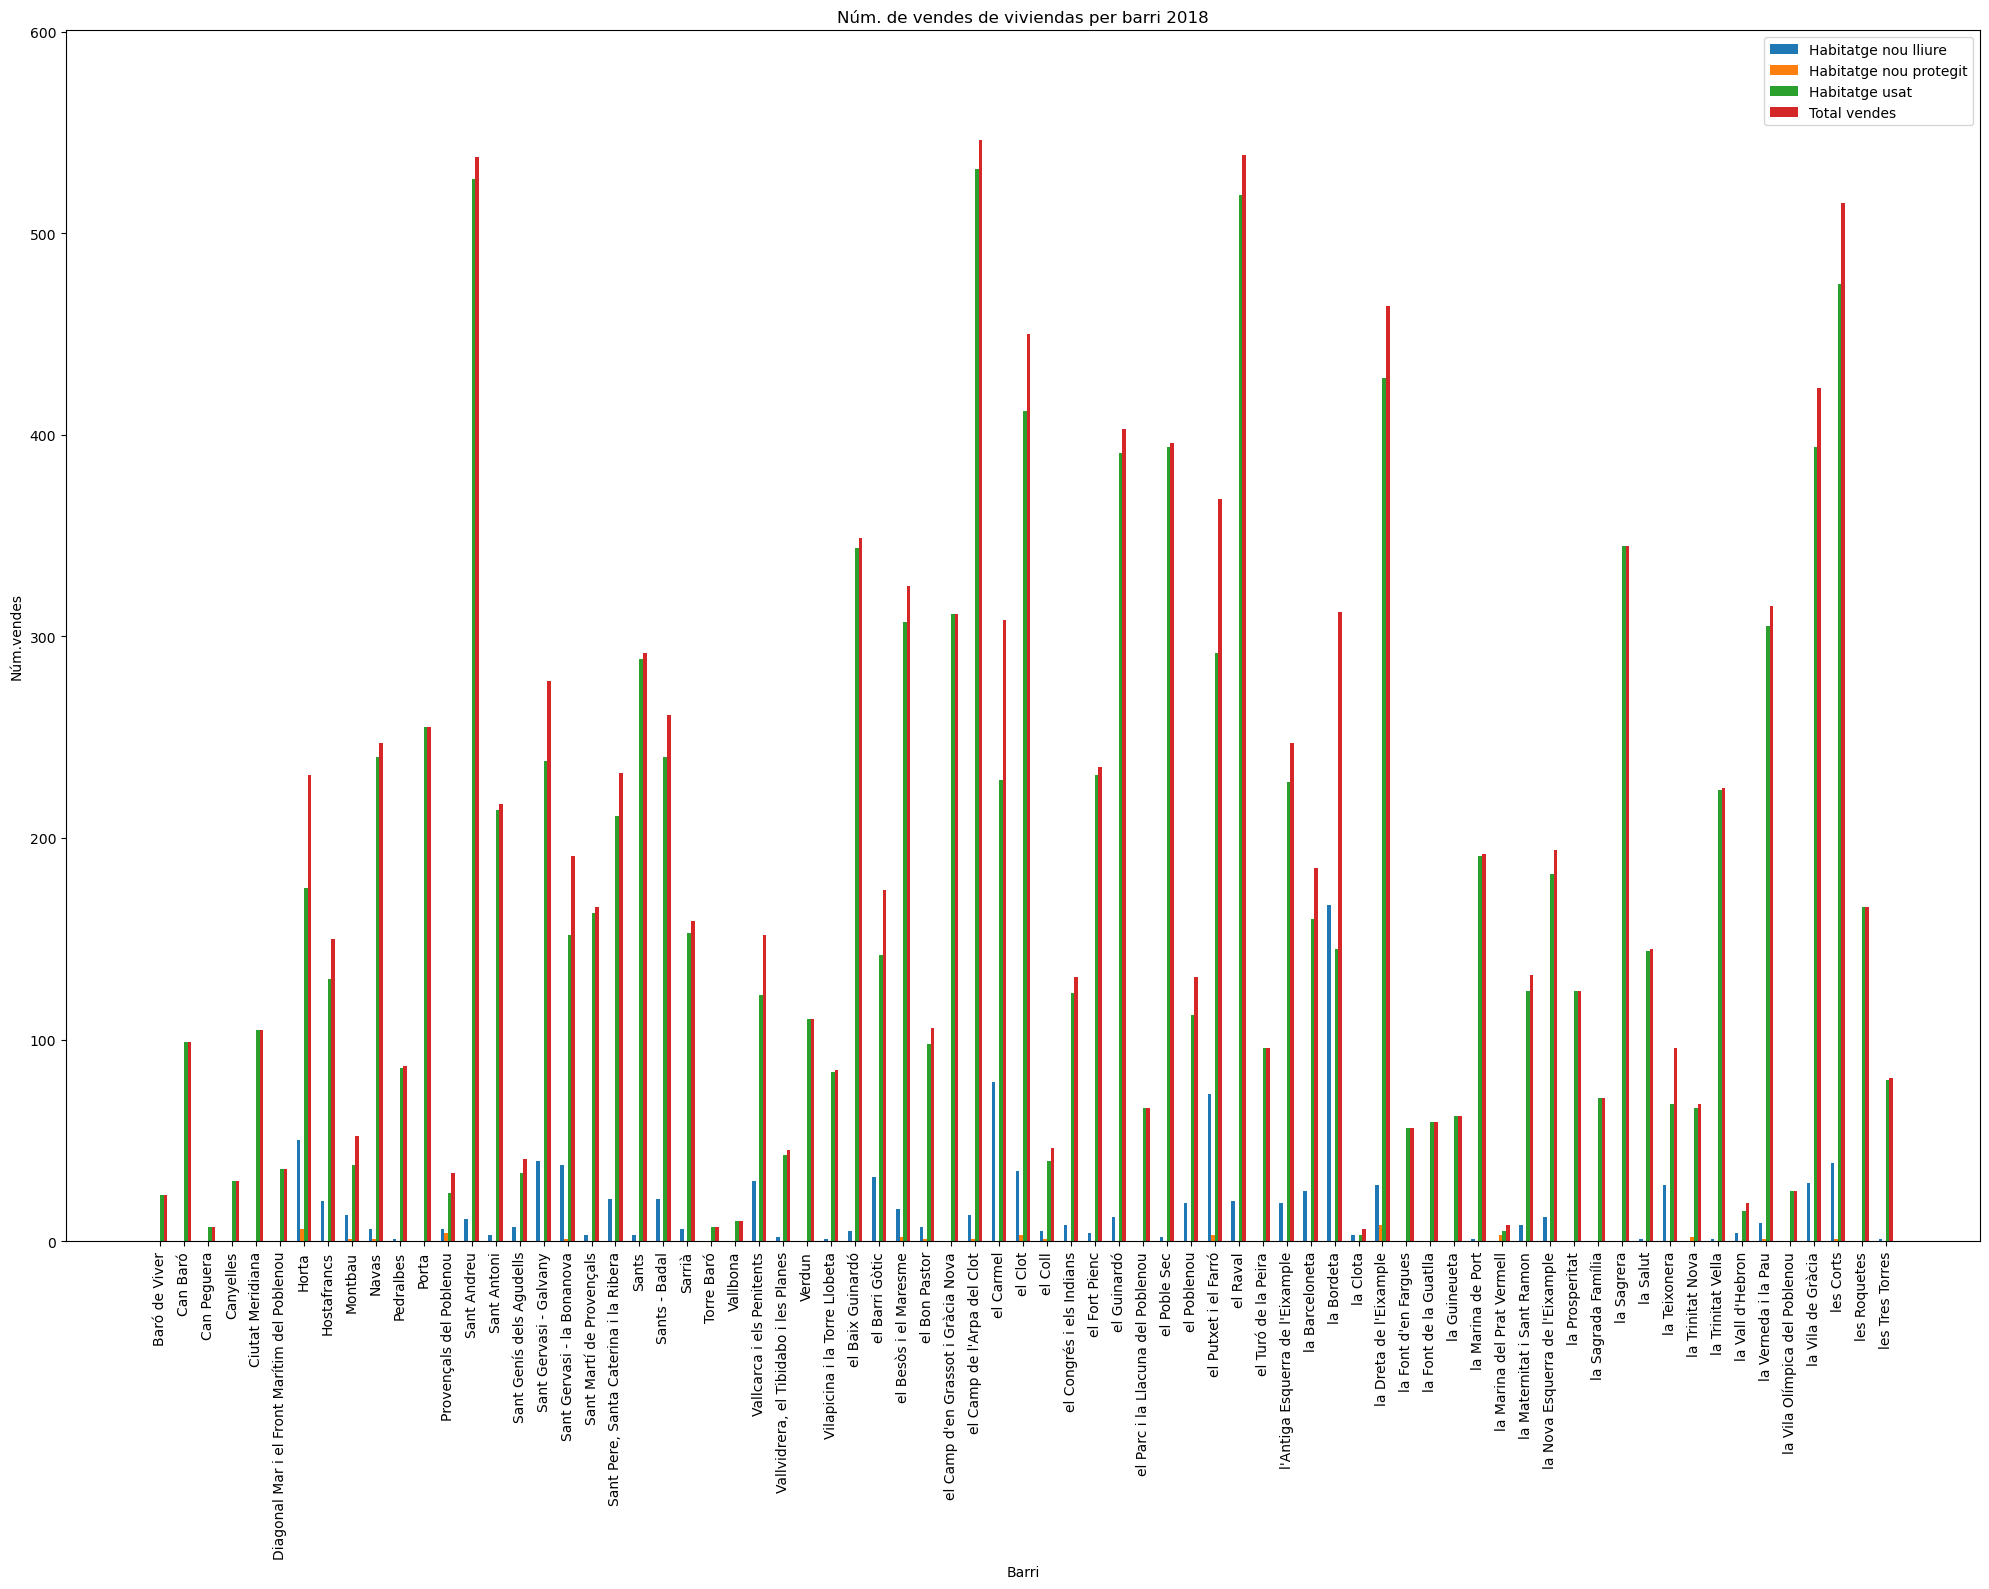

In [285]:
# Obtener los nombres de los barrios y los valores de las columnas para cada barrio
barrios = df_1_sum['Nom_Barri']
habitatge_nou_lliure = df_1_sum['Habitatge nou lliure']
habitatge_nou_protegit = df_1_sum['Habitatge nou protegit']
habitatge_usat = df_1_sum['Habitatge usat']
total_vendes = df_1_sum['Total vendes']

# Configurar las posiciones de las barras y el ancho de las barras agrupadas
pos = np.arange(len(barrios))
bar_width = 0.15

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 16))
rects1 = ax.bar(pos, habitatge_nou_lliure, bar_width, label='Habitatge nou lliure')
rects2 = ax.bar(pos + bar_width, habitatge_nou_protegit, bar_width, label='Habitatge nou protegit')
rects3 = ax.bar(pos + 2 * bar_width, habitatge_usat, bar_width, label='Habitatge usat')
rects4 = ax.bar(pos + 3 * bar_width, total_vendes, bar_width, label='Total vendes')

# Configurar el estilo del gráfico
ax.set_xlabel('Barri')
ax.set_ylabel('Núm.vendes')
ax.set_title('Núm. de vendes de viviendas per barri 2018')
ax.set_xticks(pos + 1.5 * bar_width)
ax.set_xticklabels(barrios, rotation='vertical')
ax.legend()

# Ajustar el espaciado entre las barras agrupadas
ax.margins(y=0.1)

# Mostrar el gráfico de barras agrupadas
plt.tight_layout()
plt.show()



**Dataset df_2 año 2019**

In [226]:
df_2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compravendes,Nombre
0,2019,1,1,Ciutat Vella,1,el Raval,Habitatge nou lliure,6
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Habitatge nou lliure,17
2,2019,1,1,Ciutat Vella,3,la Barceloneta,Habitatge nou lliure,2
3,2019,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Habitatge nou lliure,3
4,2019,1,2,Eixample,5,el Fort Pienc,Habitatge nou lliure,3
...,...,...,...,...,...,...,...,...
883,2019,4,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,73
884,2019,4,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,3
885,2019,4,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,34
886,2019,4,10,Sant Martí,73,la Verneda i la Pau,Habitatge usat,67


In [286]:
import pandas as pd

# Verificar si hay NaN en el DataFrame
hay_nan = df_2.isna().any().any()

if hay_nan:
    # Sustituir los NaN por 0
    df_2 = df_2.fillna(0)
    print("Se han sustituido los NaN por 0 en el DataFrame.")
else:
    print("No se encontraron NaN en el DataFrame.")


No se encontraron NaN en el DataFrame.


In [287]:
#Utilizar pivot_table para convertir los valores de 'Compravendes' en columnas
df_pivot = pd.pivot_table(df_2, index=['Any', 'Trimestre', 'Nom_Barri'], columns='Compravendes', values='Nombre').reset_index()

# Restablecer el índice sin incluir el nombre de columna "Compravendes"
df_pivot = df_pivot.rename_axis(None, axis=1)

# Agregar una columna 'Total vendes' que sume cada fila
df_pivot['Total vendes'] = df_pivot[['Habitatge nou lliure', 'Habitatge nou protegit', 'Habitatge usat']].sum(axis=1)
print(df_pivot)

      Any  Trimestre                      Nom_Barri  Habitatge nou lliure  \
0    2019          1                  Baró de Viver                     0   
1    2019          1                       Can Baró                     0   
2    2019          1                    Can Peguera                     0   
3    2019          1                      Canyelles                     0   
4    2019          1               Ciutat Meridiana                     0   
..    ...        ...                            ...                   ...   
291  2019          4  la Vila Olímpica del Poblenou                     0   
292  2019          4              la Vila de Gràcia                     3   
293  2019          4                      les Corts                     7   
294  2019          4                   les Roquetes                     0   
295  2019          4                les Tres Torres                     0   

     Habitatge nou protegit  Habitatge usat  Total vendes  
0              

In [288]:
# Sumar los datos de cada trimestre para cada barrio y eliminar la columna "Trimestre"
df_2_sum = df_pivot.groupby(['Any', 'Nom_Barri']).sum().reset_index().drop('Trimestre', axis=1)

print(df_2_sum)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2019                  Baró de Viver                     0   
1   2019                       Can Baró                     0   
2   2019                    Can Peguera                     0   
3   2019                      Canyelles                     0   
4   2019               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2019  la Vila Olímpica del Poblenou                     1   
70  2019              la Vila de Gràcia                    27   
71  2019                      les Corts                    35   
72  2019                   les Roquetes                     0   
73  2019                les Tres Torres                     2   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              10            10  
1                        0              92            92  
2                        0               8

In [289]:
# Eliminar las filas donde el valor de "Nom_Barri" sea igual a "No consta"
df_2_sum = df_2_sum[df_2_sum['Nom_Barri'] != 'No consta']

print(df_2_sum)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2019                  Baró de Viver                     0   
1   2019                       Can Baró                     0   
2   2019                    Can Peguera                     0   
3   2019                      Canyelles                     0   
4   2019               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2019  la Vila Olímpica del Poblenou                     1   
70  2019              la Vila de Gràcia                    27   
71  2019                      les Corts                    35   
72  2019                   les Roquetes                     0   
73  2019                les Tres Torres                     2   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              10            10  
1                        0              92            92  
2                        0               8

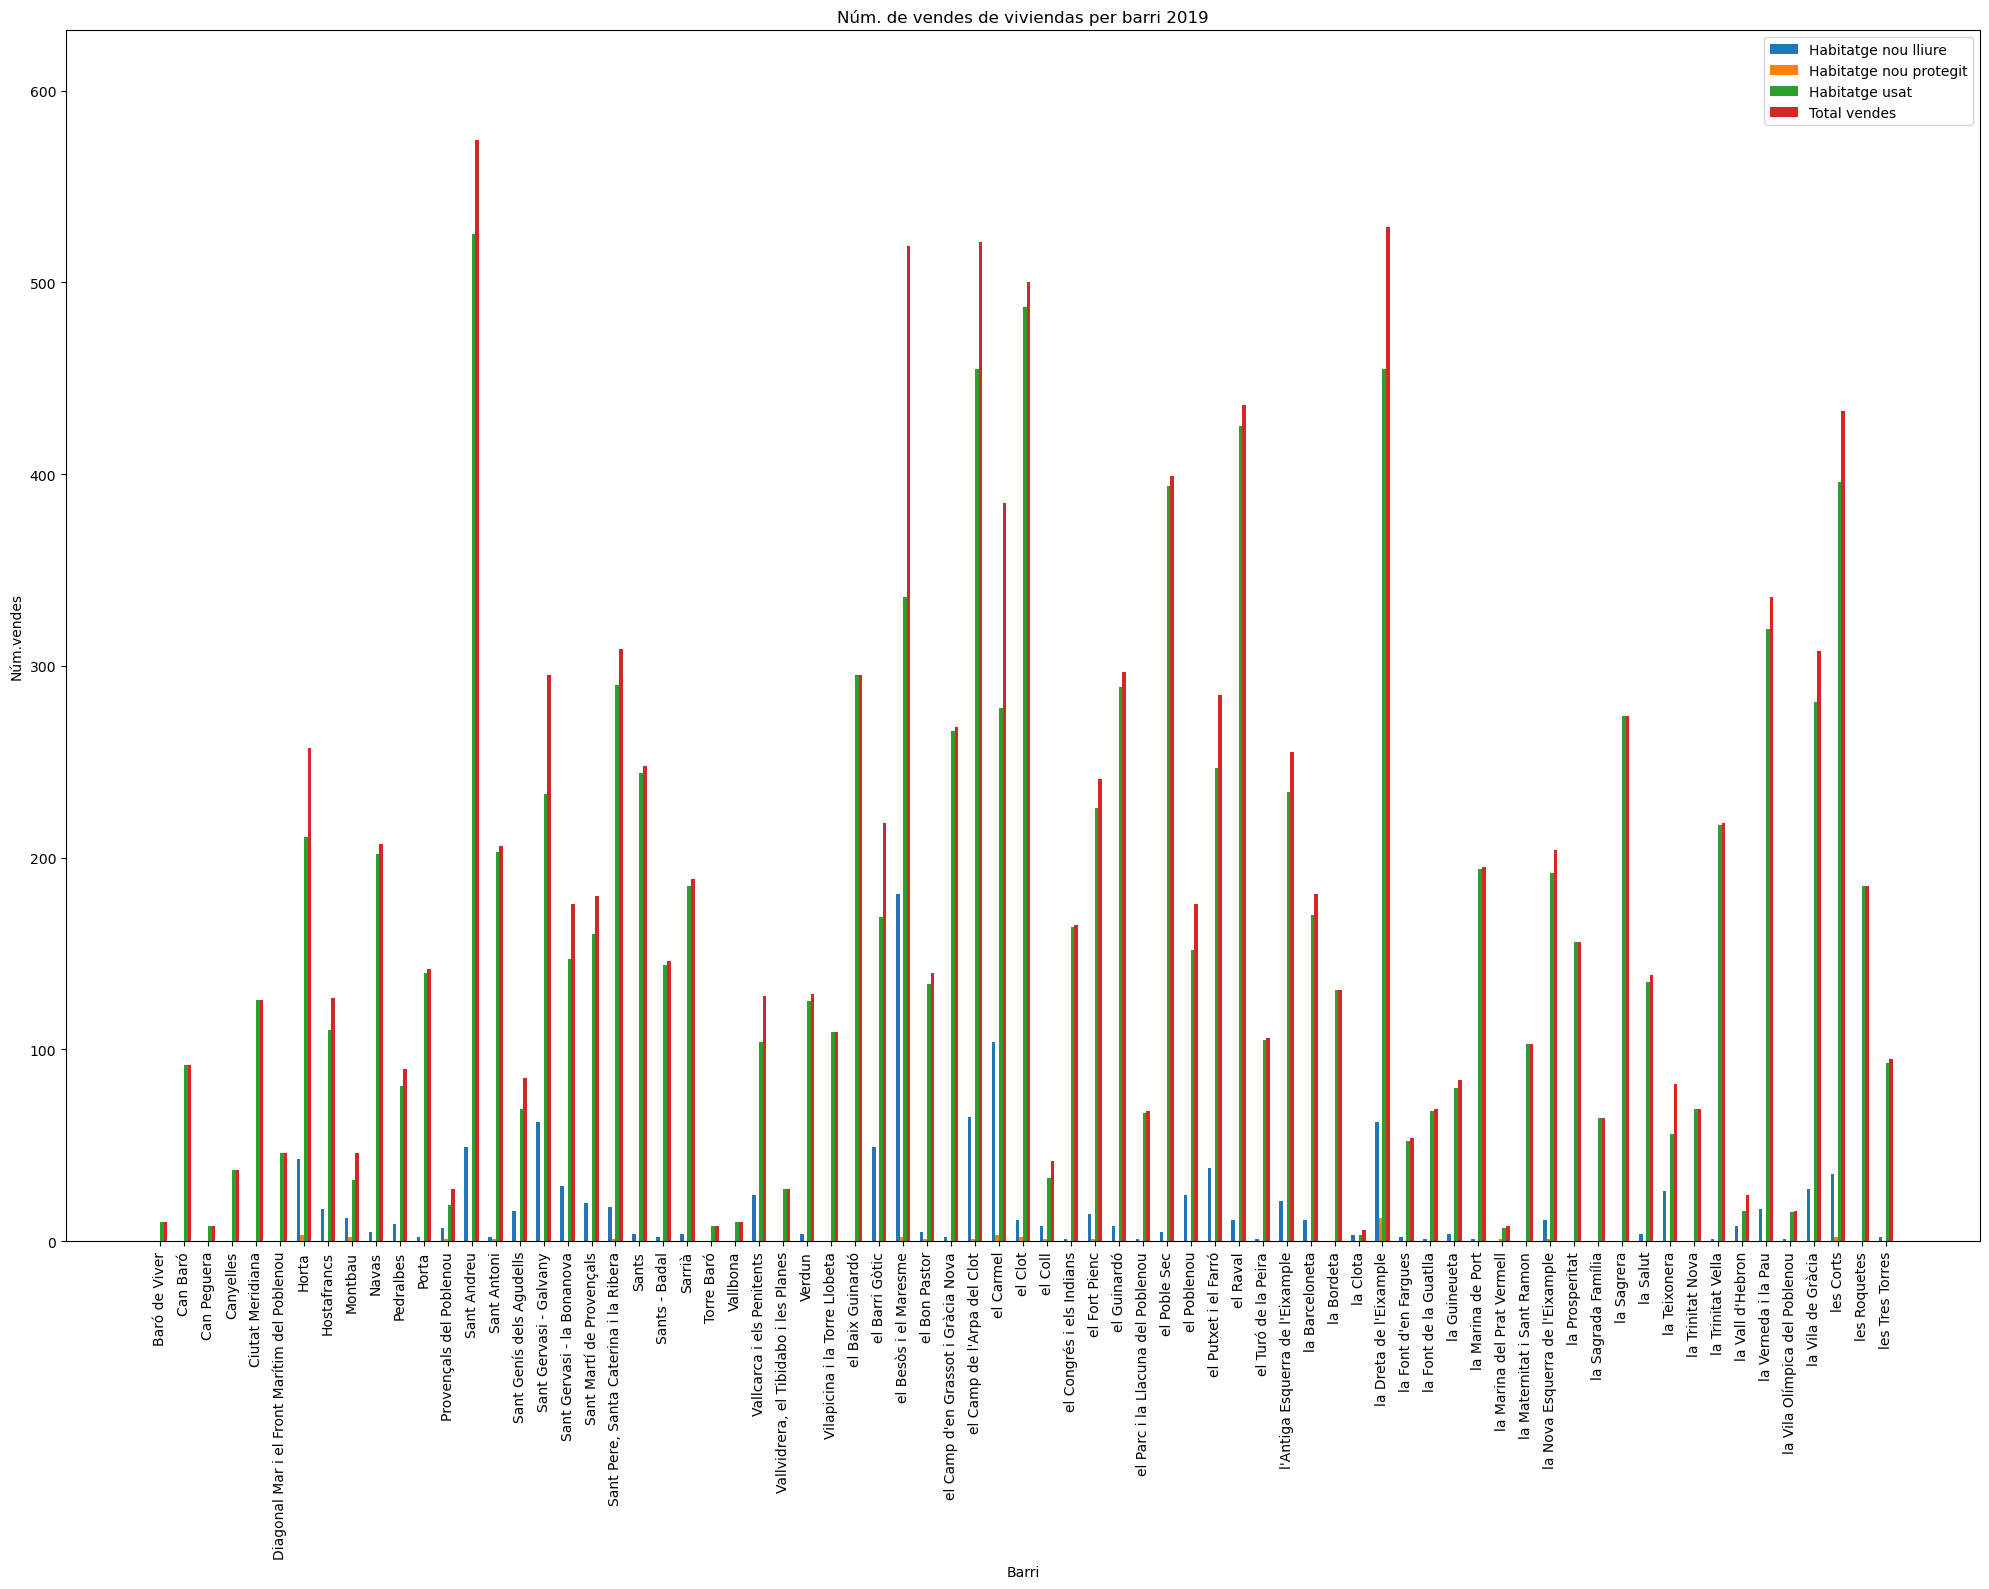

In [290]:
# Obtener los nombres de los barrios y los valores de las columnas para cada barrio
barrios = df_2_sum['Nom_Barri']
habitatge_nou_lliure = df_2_sum['Habitatge nou lliure']
habitatge_nou_protegit = df_2_sum['Habitatge nou protegit']
habitatge_usat = df_2_sum['Habitatge usat']
total_vendes = df_2_sum['Total vendes']

# Configurar las posiciones de las barras y el ancho de las barras agrupadas
pos = np.arange(len(barrios))
bar_width = 0.15

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 16))
rects1 = ax.bar(pos, habitatge_nou_lliure, bar_width, label='Habitatge nou lliure')
rects2 = ax.bar(pos + bar_width, habitatge_nou_protegit, bar_width, label='Habitatge nou protegit')
rects3 = ax.bar(pos + 2 * bar_width, habitatge_usat, bar_width, label='Habitatge usat')
rects4 = ax.bar(pos + 3 * bar_width, total_vendes, bar_width, label='Total vendes')

# Configurar el estilo del gráfico
ax.set_xlabel('Barri')
ax.set_ylabel('Núm.vendes')
ax.set_title('Núm. de vendes de viviendas per barri 2019')
ax.set_xticks(pos + 1.5 * bar_width)
ax.set_xticklabels(barrios, rotation='vertical')
ax.legend()

# Ajustar el espaciado entre las barras agrupadas
ax.margins(y=0.1)

# Mostrar el gráfico de barras agrupadas
plt.tight_layout()
plt.show()



**Dataset df_3 año 2020**

In [231]:
df_3

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compravendes,Nombre
0,2020,1,1,Ciutat Vella,1,el Raval,Habitatge nou lliure,0
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,Habitatge nou lliure,4
2,2020,1,1,Ciutat Vella,3,la Barceloneta,Habitatge nou lliure,7
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Habitatge nou lliure,3
4,2020,1,2,Eixample,5,el Fort Pienc,Habitatge nou lliure,7
...,...,...,...,...,...,...,...,...
883,2020,4,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,43
884,2020,4,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,20
885,2020,4,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,32
886,2020,4,10,Sant Martí,73,la Verneda i la Pau,Habitatge usat,37


In [291]:
import pandas as pd

# Verificar si hay NaN en el DataFrame
hay_nan = df_3.isna().any().any()

if hay_nan:
    # Sustituir los NaN por 0
    df_3 = df_3.fillna(0)
    print("Se han sustituido los NaN por 0 en el DataFrame.")
else:
    print("No se encontraron NaN en el DataFrame.")


No se encontraron NaN en el DataFrame.


In [292]:
#Utilizar pivot_table para convertir los valores de 'Compravendes' en columnas
df_pivot = pd.pivot_table(df_3, index=['Any', 'Trimestre', 'Nom_Barri'], columns='Compravendes', values='Nombre').reset_index()

# Restablecer el índice sin incluir el nombre de columna "Compravendes"
df_pivot = df_pivot.rename_axis(None, axis=1)

# Agregar una columna 'Total vendes' que sume cada fila
df_pivot['Total vendes'] = df_pivot[['Habitatge nou lliure', 'Habitatge nou protegit', 'Habitatge usat']].sum(axis=1)
print(df_pivot)

      Any  Trimestre                      Nom_Barri  Habitatge nou lliure  \
0    2020          1                  Baró de Viver                     0   
1    2020          1                       Can Baró                     0   
2    2020          1                    Can Peguera                     0   
3    2020          1                      Canyelles                     0   
4    2020          1               Ciutat Meridiana                     0   
..    ...        ...                            ...                   ...   
291  2020          4  la Vila Olímpica del Poblenou                     1   
292  2020          4              la Vila de Gràcia                    14   
293  2020          4                      les Corts                     5   
294  2020          4                   les Roquetes                     0   
295  2020          4                les Tres Torres                     0   

     Habitatge nou protegit  Habitatge usat  Total vendes  
0              

In [293]:
# Sumar los datos de cada trimestre para cada barrio y eliminar la columna "Trimestre"
df_3_sum = df_pivot.groupby(['Any', 'Nom_Barri']).sum().reset_index().drop('Trimestre', axis=1)

print(df_3_sum)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2020                  Baró de Viver                     0   
1   2020                       Can Baró                     0   
2   2020                    Can Peguera                     0   
3   2020                      Canyelles                     0   
4   2020               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2020  la Vila Olímpica del Poblenou                     1   
70  2020              la Vila de Gràcia                    34   
71  2020                      les Corts                    45   
72  2020                   les Roquetes                     0   
73  2020                les Tres Torres                     3   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              15            15  
1                        0              85            85  
2                        0              23

In [294]:
# Eliminar las filas donde el valor de "Nom_Barri" sea igual a "No consta"
df_3_sum = df_3_sum[df_3_sum['Nom_Barri'] != 'No consta']

print(df_3_sum)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2020                  Baró de Viver                     0   
1   2020                       Can Baró                     0   
2   2020                    Can Peguera                     0   
3   2020                      Canyelles                     0   
4   2020               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2020  la Vila Olímpica del Poblenou                     1   
70  2020              la Vila de Gràcia                    34   
71  2020                      les Corts                    45   
72  2020                   les Roquetes                     0   
73  2020                les Tres Torres                     3   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              15            15  
1                        0              85            85  
2                        0              23

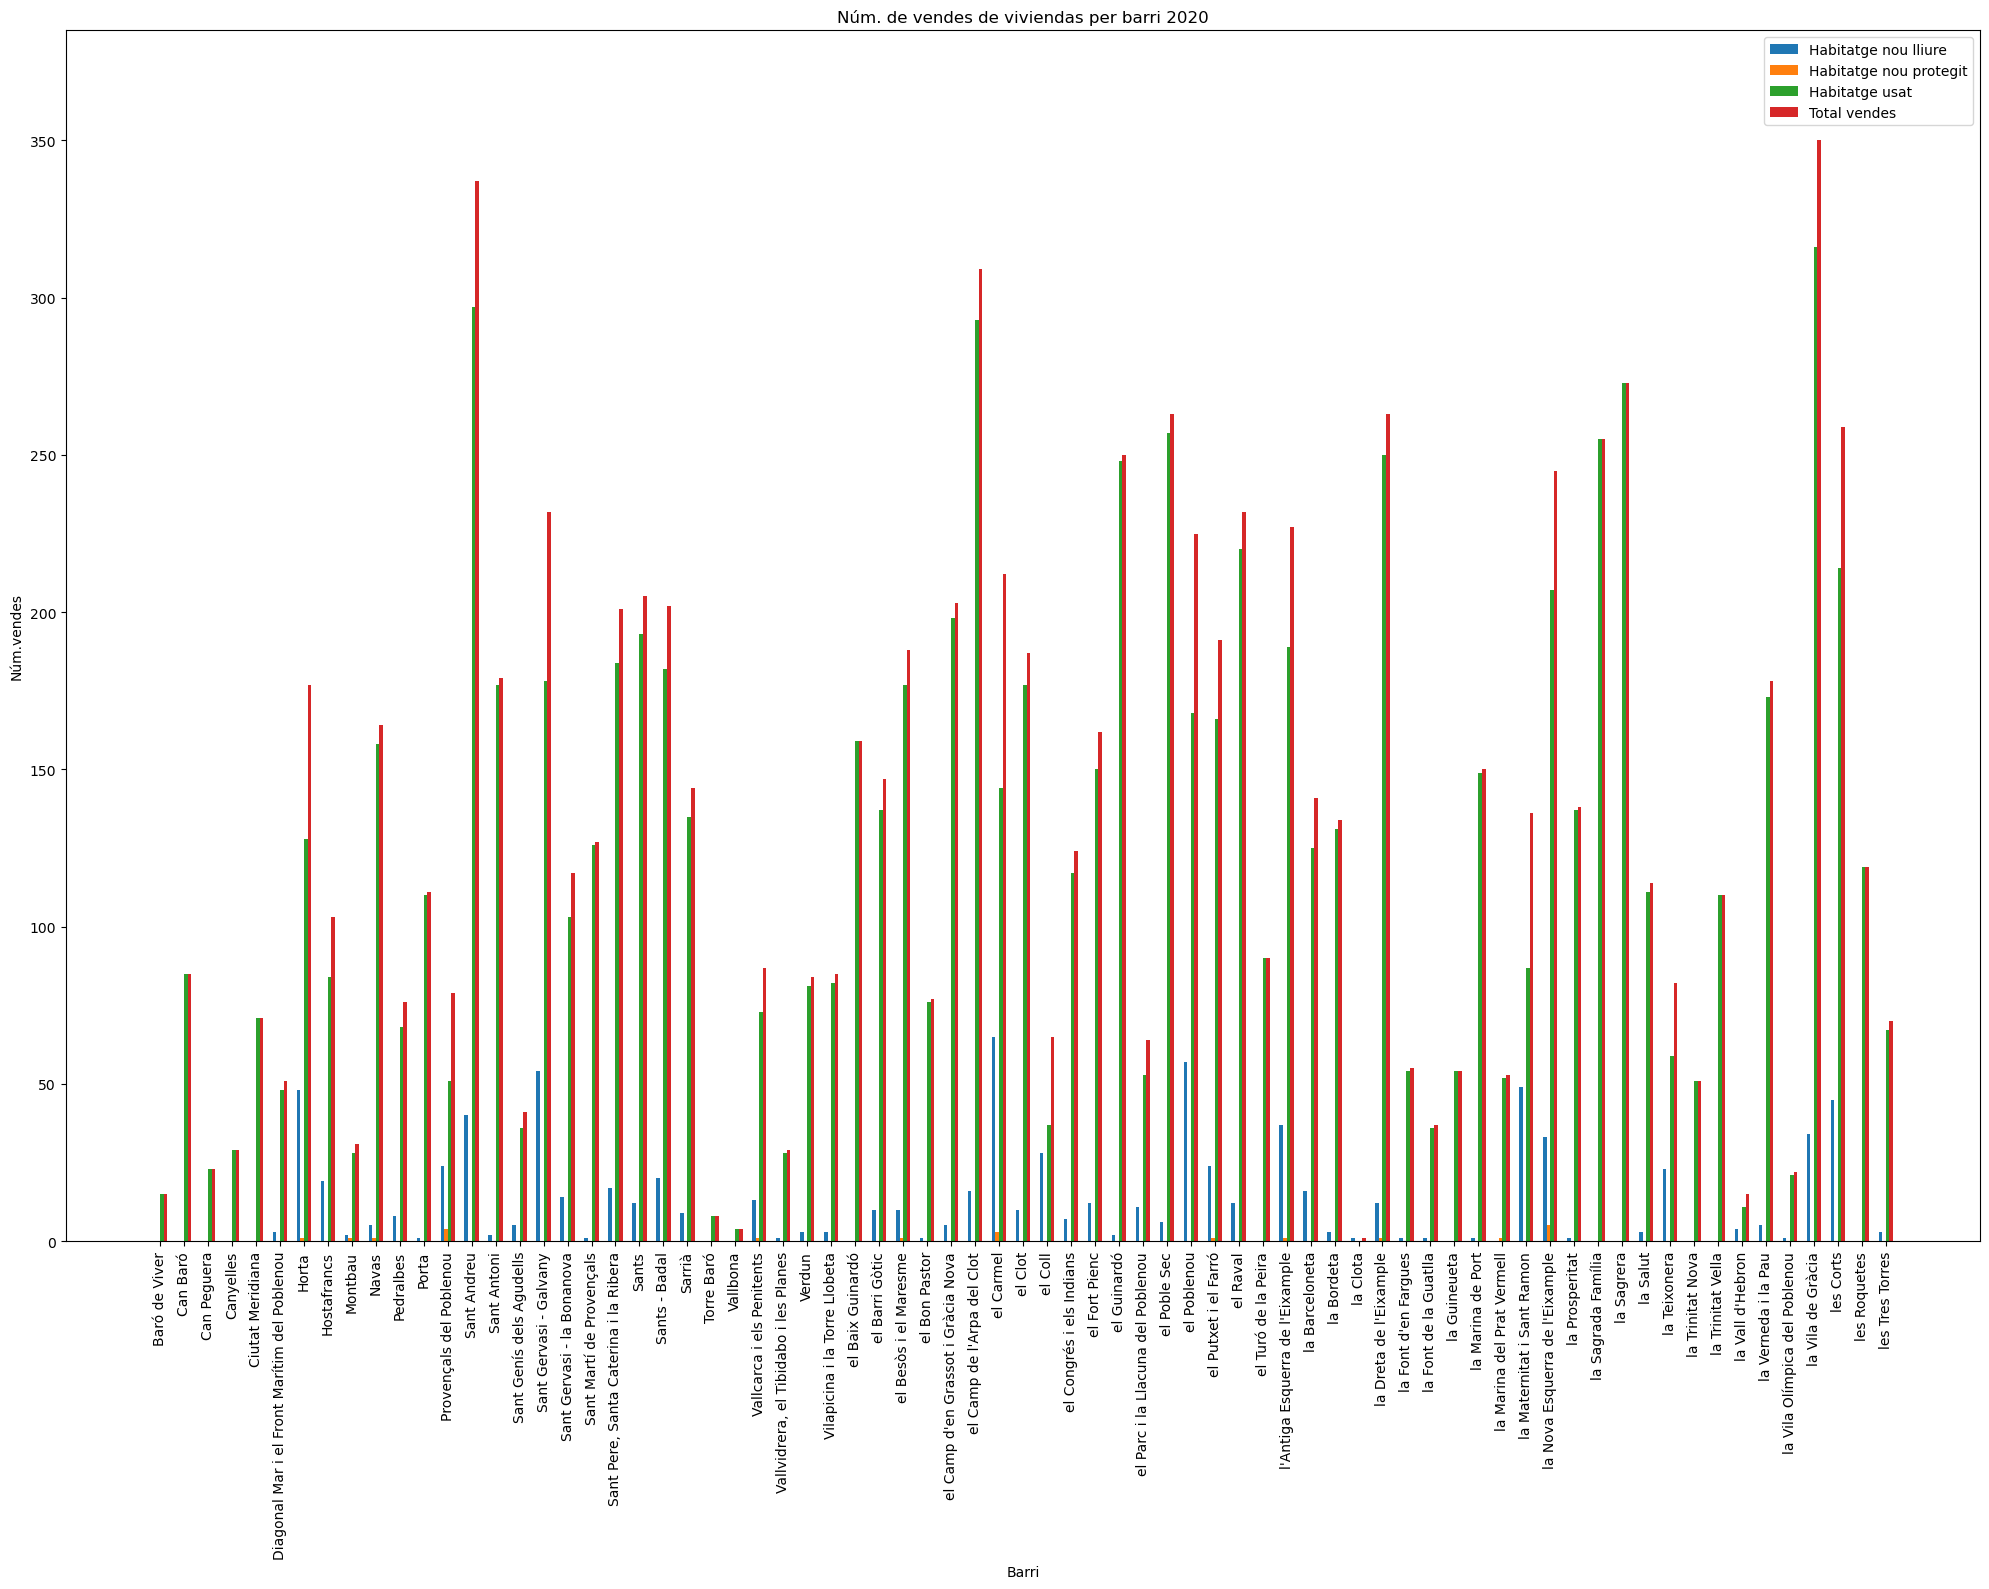

In [295]:
# Obtener los nombres de los barrios y los valores de las columnas para cada barrio
barrios = df_3_sum['Nom_Barri']
habitatge_nou_lliure = df_3_sum['Habitatge nou lliure']
habitatge_nou_protegit = df_3_sum['Habitatge nou protegit']
habitatge_usat = df_3_sum['Habitatge usat']
total_vendes = df_3_sum['Total vendes']

# Configurar las posiciones de las barras y el ancho de las barras agrupadas
pos = np.arange(len(barrios))
bar_width = 0.15

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 16))
rects1 = ax.bar(pos, habitatge_nou_lliure, bar_width, label='Habitatge nou lliure')
rects2 = ax.bar(pos + bar_width, habitatge_nou_protegit, bar_width, label='Habitatge nou protegit')
rects3 = ax.bar(pos + 2 * bar_width, habitatge_usat, bar_width, label='Habitatge usat')
rects4 = ax.bar(pos + 3 * bar_width, total_vendes, bar_width, label='Total vendes')

# Configurar el estilo del gráfico
ax.set_xlabel('Barri')
ax.set_ylabel('Núm.vendes')
ax.set_title('Núm. de vendes de viviendas per barri 2020')
ax.set_xticks(pos + 1.5 * bar_width)
ax.set_xticklabels(barrios, rotation='vertical')
ax.legend()

# Ajustar el espaciado entre las barras agrupadas
ax.margins(y=0.1)

# Mostrar el gráfico de barras agrupadas
plt.tight_layout()
plt.show()

**Dataset df_4 año 2021**

En este dataframe me he encontrado varios problemas, el formato del cvs. no me localizaba la el dato 'Habitatge nou lliure' de la columna 'Compravendes'. La columna 'Nombre' tampoco estaba en formato númerico

In [296]:
df_4

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compravendes,Nombre
0,2021,1,1,Ciutat Vella,1,el Raval,Habitatge nou lliure,5
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Habitatge nou lliure,1
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Habitatge nou lliure,1
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Habitatge nou lliure,5
4,2021,1,2,Eixample,5,el Fort Pienc,Habitatge nou lliure,2
...,...,...,...,...,...,...,...,...
883,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,48
884,2021,4,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,17
885,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,46
886,2021,4,10,Sant Martí,73,la Verneda i la Pau,Habitatge usat,54


In [297]:
pivote = df_4.pivot(index= ['Any','Trimestre','Nom_Barri'], columns='Compravendes', values='Nombre')
# Reiniciar los índices y dar nombres a las columnas
pivote = pivote.reset_index()
pivote.columns.name = None

# Visualizar el nuevo dataframe pivote
print(pivote)

      Any  Trimestre                      Nom_Barri Habitatge nou lliure  \
0    2021          1                  Baró de Viver                   --   
1    2021          1                       Can Baró                   --   
2    2021          1                    Can Peguera                   --   
3    2021          1                      Canyelles                   --   
4    2021          1               Ciutat Meridiana                   --   
..    ...        ...                            ...                  ...   
291  2021          4  la Vila Olímpica del Poblenou                    1   
292  2021          4              la Vila de Gràcia                    2   
293  2021          4                      les Corts                    9   
294  2021          4                   les Roquetes                   --   
295  2021          4                les Tres Torres                    2   

    Habitatge nou protegit Habitatge usat  
0                       --              6  

In [298]:
pivote = pivote.replace("--", 0)
pivote['Habitatge nou lliure'] = pivote['Habitatge nou lliure'].astype(int)
pivote['Habitatge nou protegit'] = pivote['Habitatge nou protegit'].astype(int)
pivote['Habitatge usat'] = pivote['Habitatge usat'].astype(int)

In [299]:
pivote['Total vendes'] = pivote[['Habitatge nou lliure', 'Habitatge nou protegit', 'Habitatge usat']].sum(axis=1)
print(pivote)

      Any  Trimestre                      Nom_Barri  Habitatge nou lliure  \
0    2021          1                  Baró de Viver                     0   
1    2021          1                       Can Baró                     0   
2    2021          1                    Can Peguera                     0   
3    2021          1                      Canyelles                     0   
4    2021          1               Ciutat Meridiana                     0   
..    ...        ...                            ...                   ...   
291  2021          4  la Vila Olímpica del Poblenou                     1   
292  2021          4              la Vila de Gràcia                     2   
293  2021          4                      les Corts                     9   
294  2021          4                   les Roquetes                     0   
295  2021          4                les Tres Torres                     2   

     Habitatge nou protegit  Habitatge usat  Total vendes  
0              

In [324]:
# Agrupar por 'Any' y 'Nom_Barri' y sumar los valores de cada trimestre
df_4_pivote_anual = pivote.groupby(['Any', 'Nom_Barri']).sum().reset_index()

# Eliminar la columna 'Trimestre'
df_4_pivote_anual = df_4_pivote_anual.drop('Trimestre', axis=1)

# Visualizar el nuevo dataframe pivote anual
print(df_4_pivote_anual)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2022                  Baró de Viver                     0   
1   2022                       Can Baró                     1   
2   2022                    Can Peguera                     0   
3   2022                      Canyelles                     0   
4   2022               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2022  la Vila Olímpica del Poblenou                     6   
70  2022              la Vila de Gràcia                    29   
71  2022                      les Corts                    18   
72  2022                   les Roquetes                     0   
73  2022                les Tres Torres                     6   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              17            17  
1                        0              49            50  
2                        0               8

In [325]:
# Eliminar las filas donde el valor de "Nom_Barri" sea igual a "No consta"
df_4_pivote_anual = df_4_pivote_anual[df_4_pivote_anual['Nom_Barri'] != 'No consta']

print(df_4_pivote_anual)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2022                  Baró de Viver                     0   
1   2022                       Can Baró                     1   
2   2022                    Can Peguera                     0   
3   2022                      Canyelles                     0   
4   2022               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2022  la Vila Olímpica del Poblenou                     6   
70  2022              la Vila de Gràcia                    29   
71  2022                      les Corts                    18   
72  2022                   les Roquetes                     0   
73  2022                les Tres Torres                     6   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              17            17  
1                        0              49            50  
2                        0               8

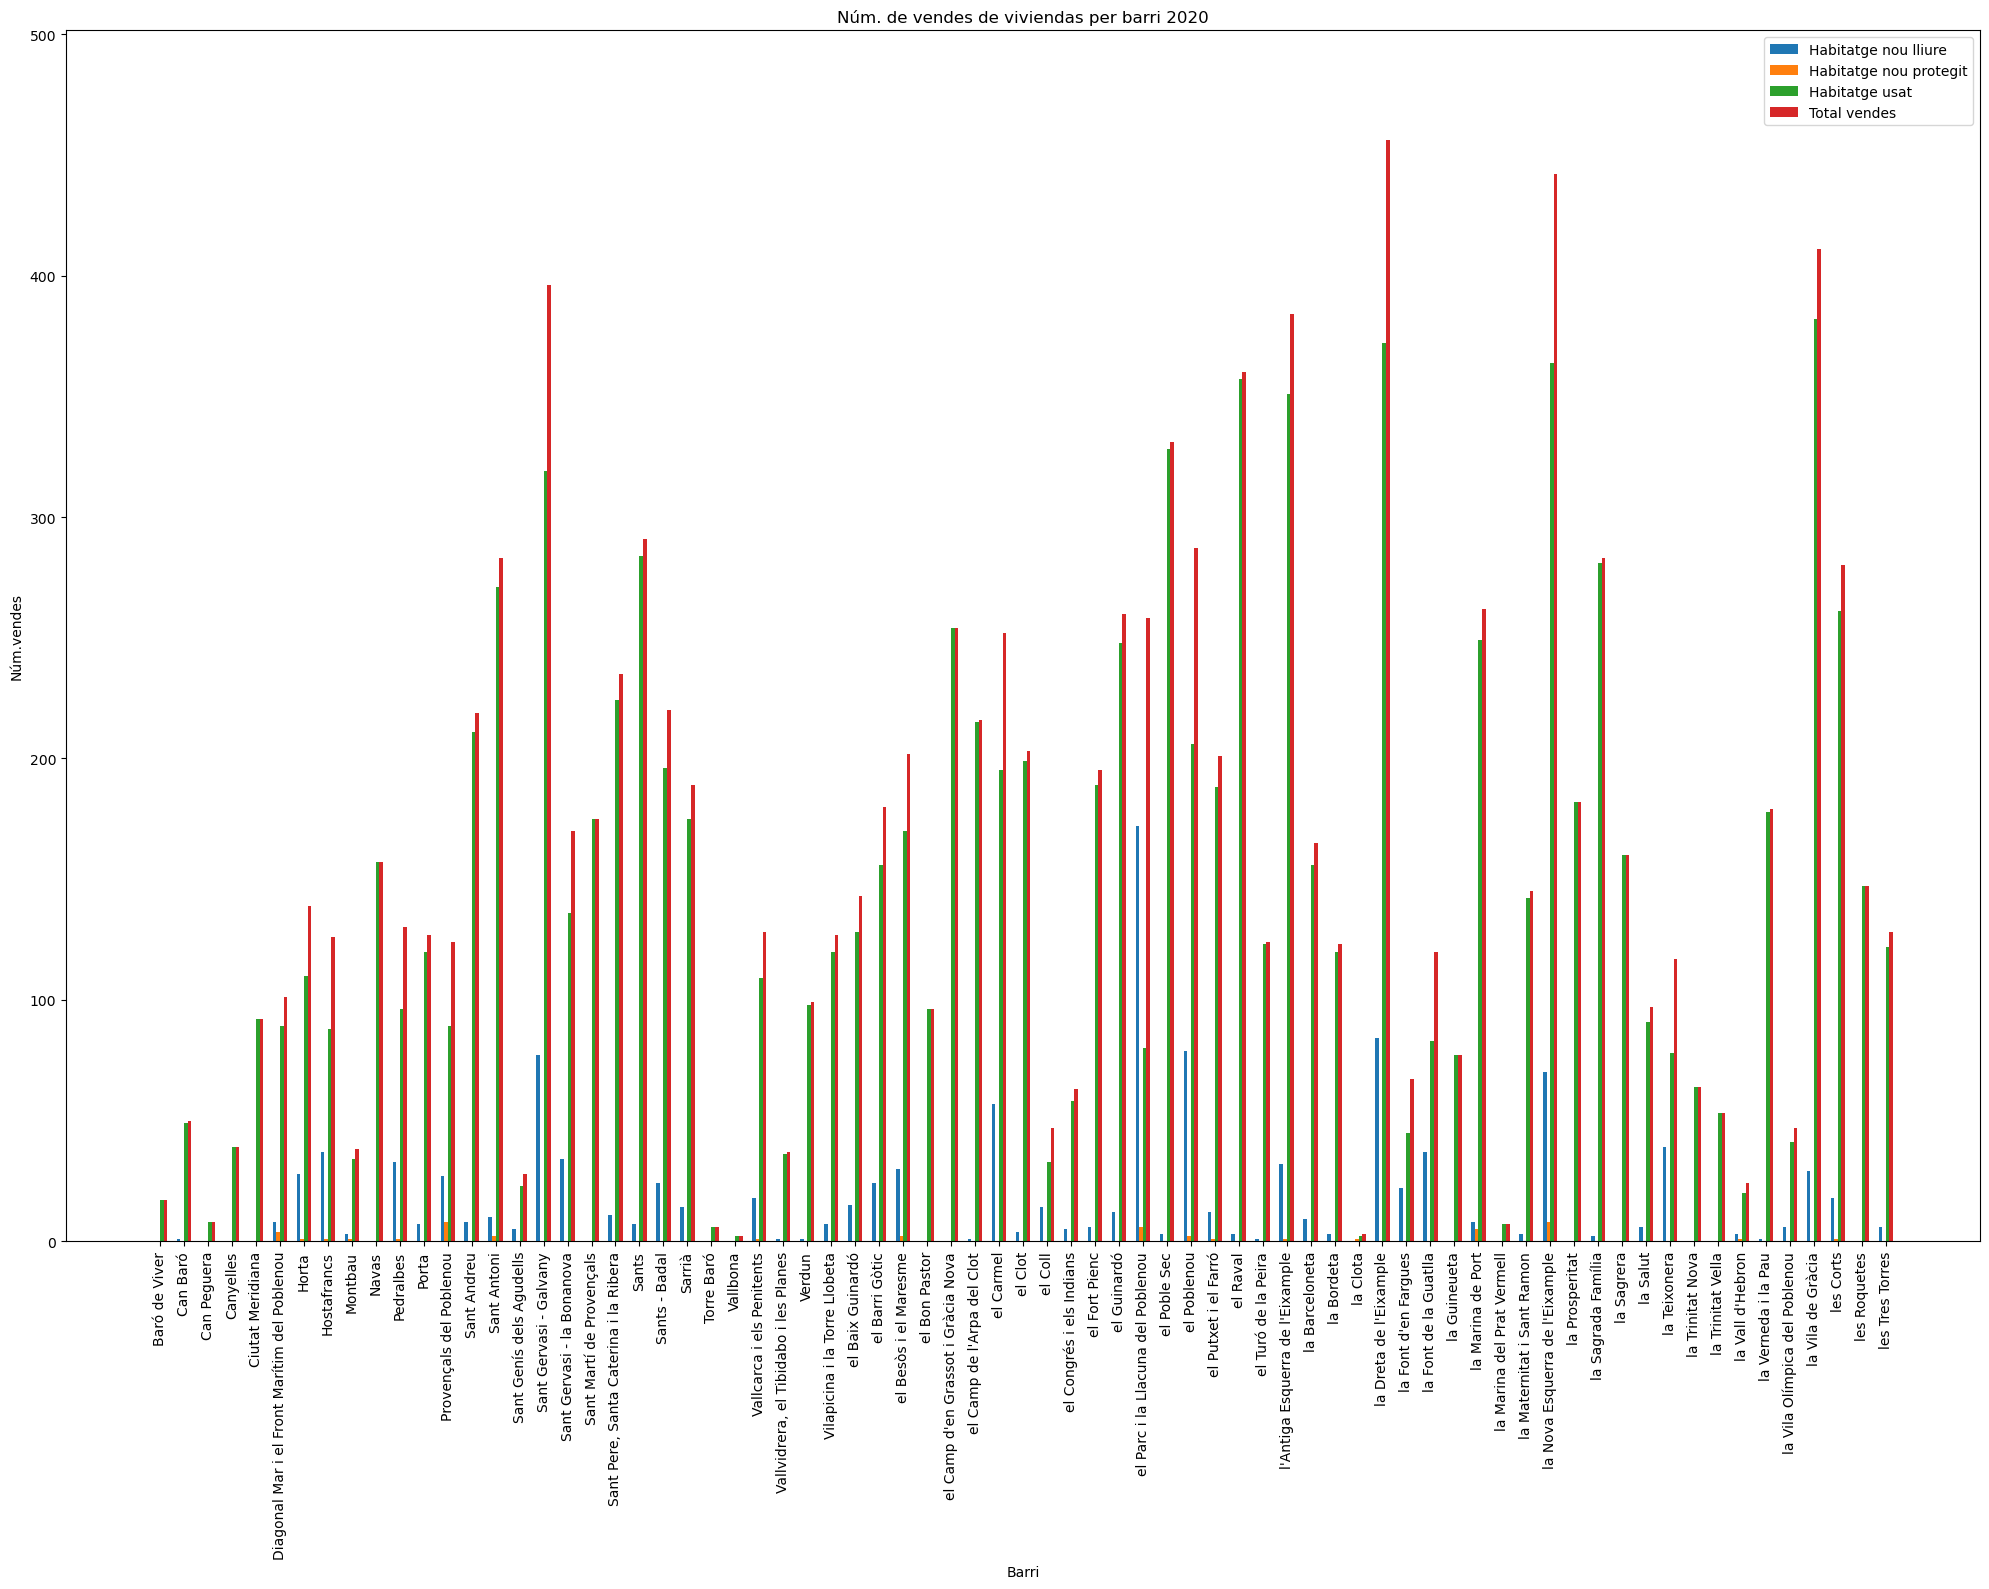

In [326]:
# Obtener los nombres de los barrios y los valores de las columnas para cada barrio
barrios = df_4_pivote_anual['Nom_Barri']
habitatge_nou_lliure = df_4_pivote_anual['Habitatge nou lliure']
habitatge_nou_protegit = df_4_pivote_anual['Habitatge nou protegit']
habitatge_usat = df_4_pivote_anual['Habitatge usat']
total_vendes = df_4_pivote_anual['Total vendes']

# Configurar las posiciones de las barras y el ancho de las barras agrupadas
pos = np.arange(len(barrios))
bar_width = 0.15

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 16))
rects1 = ax.bar(pos, habitatge_nou_lliure, bar_width, label='Habitatge nou lliure')
rects2 = ax.bar(pos + bar_width, habitatge_nou_protegit, bar_width, label='Habitatge nou protegit')
rects3 = ax.bar(pos + 2 * bar_width, habitatge_usat, bar_width, label='Habitatge usat')
rects4 = ax.bar(pos + 3 * bar_width, total_vendes, bar_width, label='Total vendes')

# Configurar el estilo del gráfico
ax.set_xlabel('Barri')
ax.set_ylabel('Núm.vendes')
ax.set_title('Núm. de vendes de viviendas per barri 2020')
ax.set_xticks(pos + 1.5 * bar_width)
ax.set_xticklabels(barrios, rotation='vertical')
ax.legend()

# Ajustar el espaciado entre las barras agrupadas
ax.margins(y=0.1)

# Mostrar el gráfico de barras agrupadas
plt.tight_layout()
plt.show()

**Dataset df_5 año 2022**

In [303]:
df_5

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compravendes,Nombre
0,2022,1,1,Ciutat Vella,1,el Raval,Habitatge nou lliure,--
1,2022,1,1,Ciutat Vella,2,el Barri Gòtic,Habitatge nou lliure,4
2,2022,1,1,Ciutat Vella,3,la Barceloneta,Habitatge nou lliure,5
3,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Habitatge nou lliure,7
4,2022,1,2,Eixample,5,el Fort Pienc,Habitatge nou lliure,4
...,...,...,...,...,...,...,...,...
661,2022,3,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,60
662,2022,3,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,31
663,2022,3,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,59
664,2022,3,10,Sant Martí,73,la Verneda i la Pau,Habitatge usat,62


In [304]:
pivote = df_5.pivot(index= ['Any','Trimestre','Nom_Barri'], columns='Compravendes', values='Nombre')
# Reiniciar los índices y dar nombres a las columnas
pivote = pivote.reset_index()
pivote.columns.name = None

# Visualizar el nuevo dataframe pivote
print(pivote)

      Any  Trimestre                      Nom_Barri Habitatge nou lliure  \
0    2022          1                  Baró de Viver                   --   
1    2022          1                       Can Baró                   --   
2    2022          1                    Can Peguera                   --   
3    2022          1                      Canyelles                   --   
4    2022          1               Ciutat Meridiana                   --   
..    ...        ...                            ...                  ...   
217  2022          3  la Vila Olímpica del Poblenou                    1   
218  2022          3              la Vila de Gràcia                   24   
219  2022          3                      les Corts                    5   
220  2022          3                   les Roquetes                   --   
221  2022          3                les Tres Torres                    3   

    Habitatge nou protegit Habitatge usat  
0                       --              8  

In [305]:
pivote = pivote.replace("--", 0)
pivote['Habitatge nou lliure'] = pivote['Habitatge nou lliure'].astype(int)
pivote['Habitatge nou protegit'] = pivote['Habitatge nou protegit'].astype(int)
pivote['Habitatge usat'] = pivote['Habitatge usat'].astype(int)

In [317]:
pivote['Total vendes'] = pivote[['Habitatge nou lliure', 'Habitatge nou protegit', 'Habitatge usat']].sum(axis=1)
print(pivote)

      Any  Trimestre                      Nom_Barri  Habitatge nou lliure  \
0    2022          1                  Baró de Viver                     0   
1    2022          1                       Can Baró                     0   
2    2022          1                    Can Peguera                     0   
3    2022          1                      Canyelles                     0   
4    2022          1               Ciutat Meridiana                     0   
..    ...        ...                            ...                   ...   
217  2022          3  la Vila Olímpica del Poblenou                     1   
218  2022          3              la Vila de Gràcia                    24   
219  2022          3                      les Corts                     5   
220  2022          3                   les Roquetes                     0   
221  2022          3                les Tres Torres                     3   

     Habitatge nou protegit  Habitatge usat  Total vendes  
0              

In [319]:
# Agrupar por 'Any' y 'Nom_Barri' y sumar los valores de cada trimestre
pivote_anual = pivote.groupby(['Any', 'Nom_Barri']).sum().reset_index()

# Eliminar la columna 'Trimestre'
pivote_anual = pivote_anual.drop('Trimestre', axis=1)

# Visualizar el nuevo dataframe pivote anual
print(pivote_anual)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2022                  Baró de Viver                     0   
1   2022                       Can Baró                     1   
2   2022                    Can Peguera                     0   
3   2022                      Canyelles                     0   
4   2022               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2022  la Vila Olímpica del Poblenou                     6   
70  2022              la Vila de Gràcia                    29   
71  2022                      les Corts                    18   
72  2022                   les Roquetes                     0   
73  2022                les Tres Torres                     6   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              17            17  
1                        0              49            50  
2                        0               8

In [321]:
# Eliminar las filas donde el valor de "Nom_Barri" sea igual a "No consta"
pivote_anual = pivote_anual[pivote_anual['Nom_Barri'] != 'No consta']

print(pivote_anual)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2022                  Baró de Viver                     0   
1   2022                       Can Baró                     1   
2   2022                    Can Peguera                     0   
3   2022                      Canyelles                     0   
4   2022               Ciutat Meridiana                     0   
..   ...                            ...                   ...   
69  2022  la Vila Olímpica del Poblenou                     6   
70  2022              la Vila de Gràcia                    29   
71  2022                      les Corts                    18   
72  2022                   les Roquetes                     0   
73  2022                les Tres Torres                     6   

    Habitatge nou protegit  Habitatge usat  Total vendes  
0                        0              17            17  
1                        0              49            50  
2                        0               8

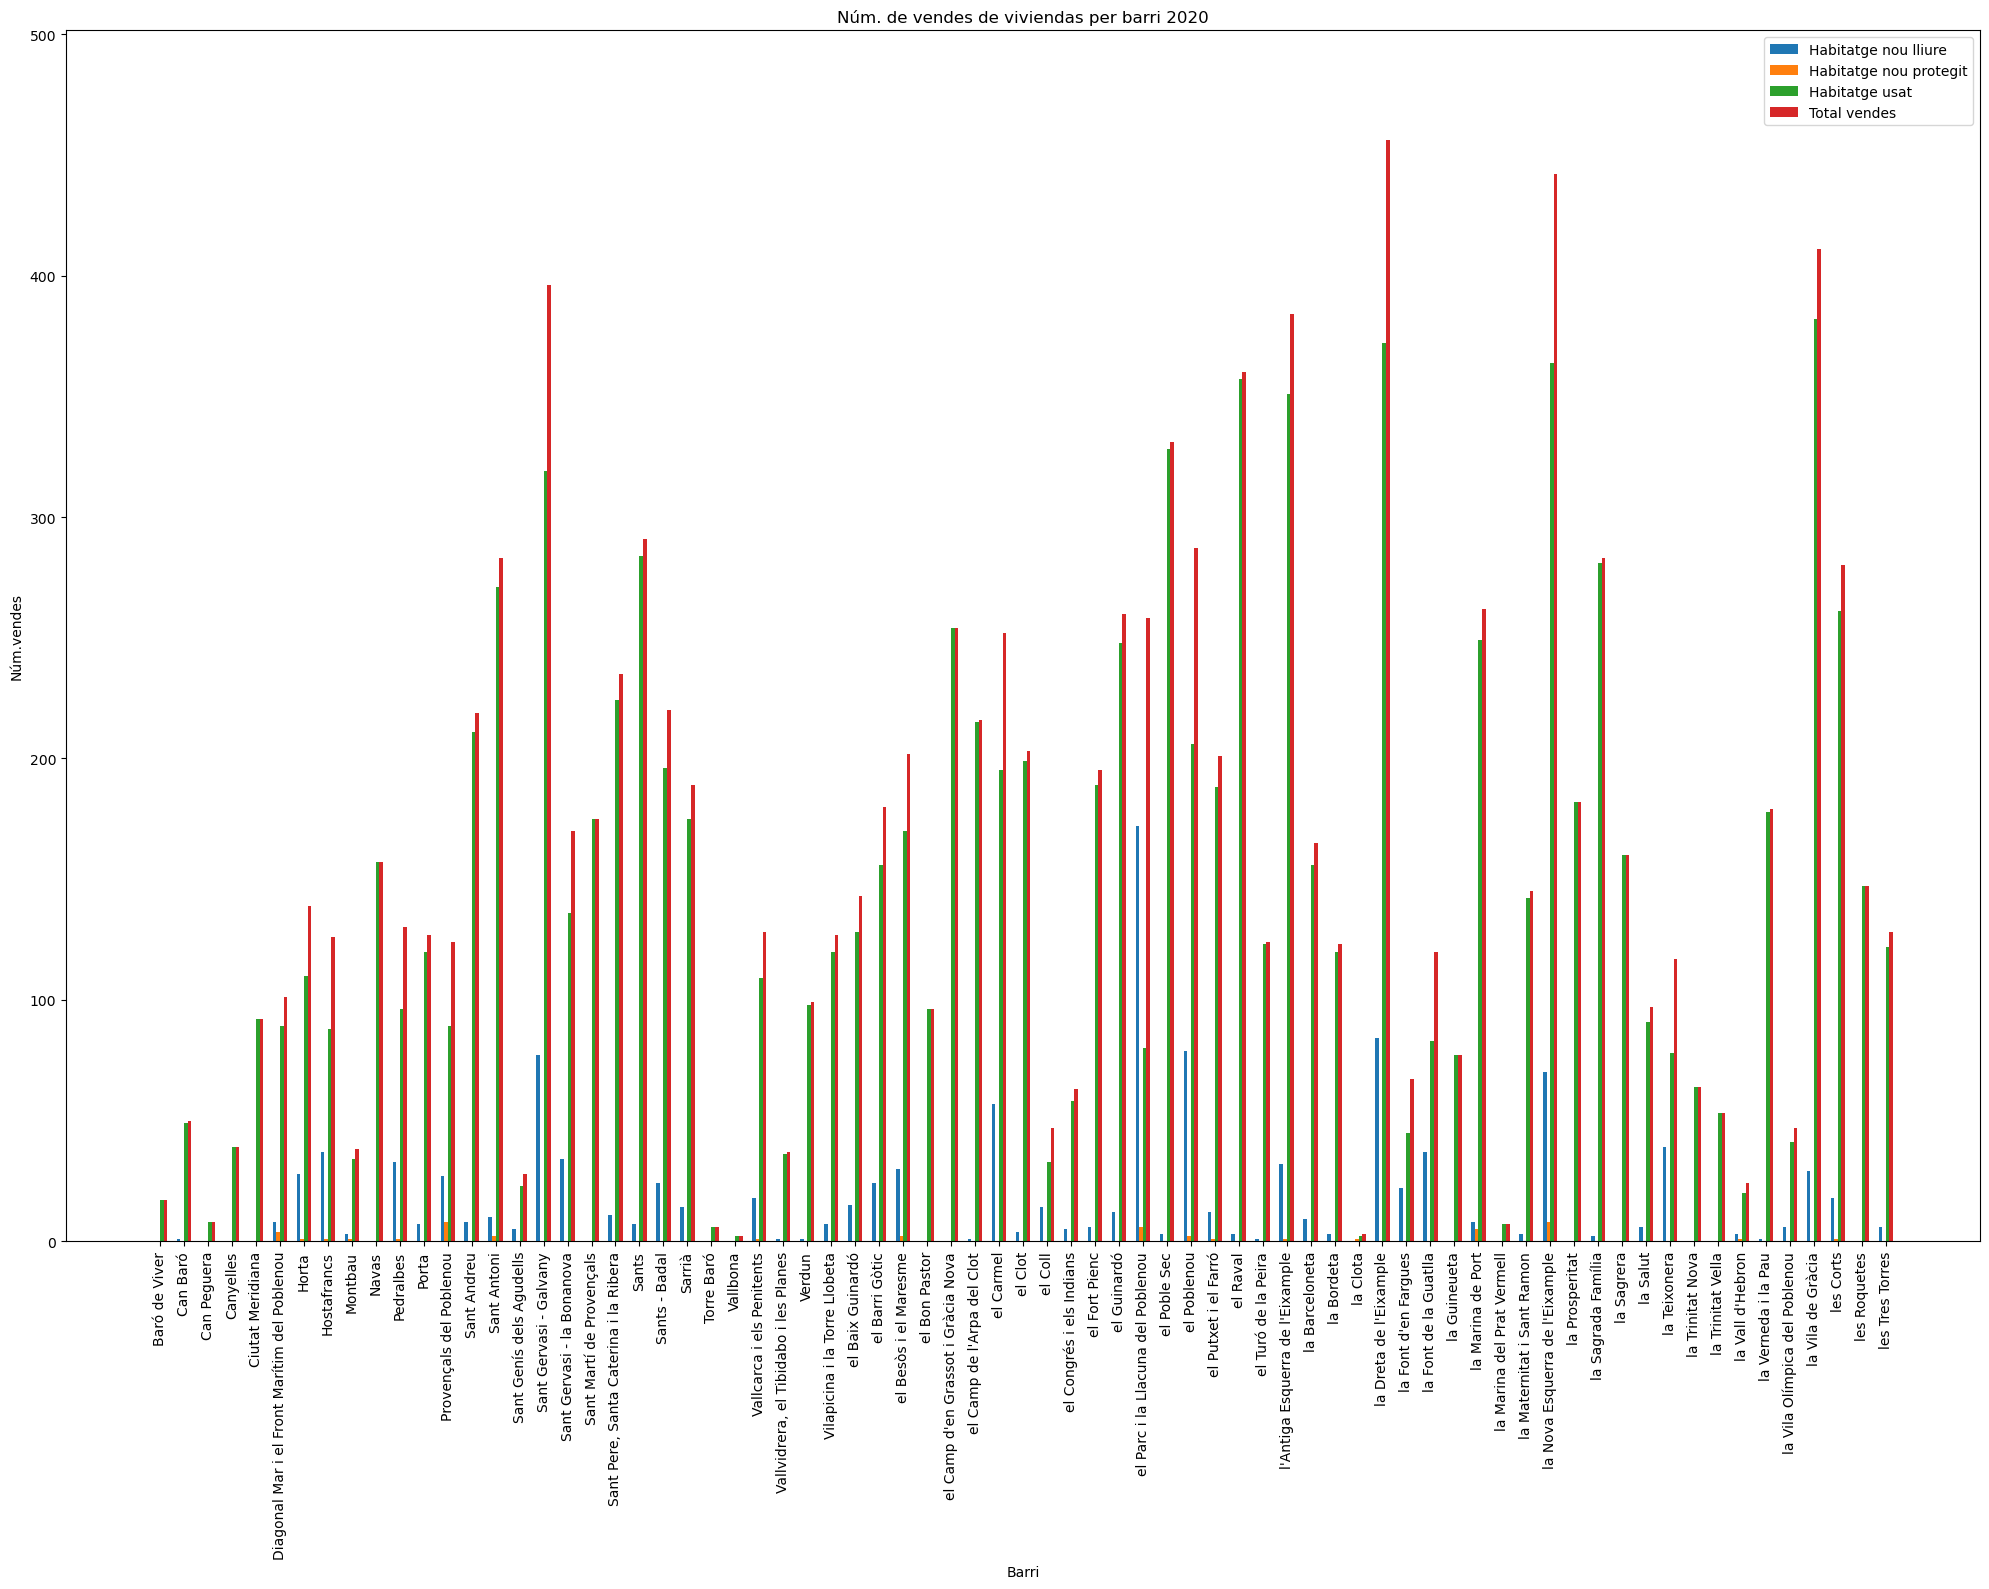

In [322]:
# Obtener los nombres de los barrios y los valores de las columnas para cada barrio
barrios = pivote_anual['Nom_Barri']
habitatge_nou_lliure = pivote_anual['Habitatge nou lliure']
habitatge_nou_protegit = pivote_anual['Habitatge nou protegit']
habitatge_usat = pivote_anual['Habitatge usat']
total_vendes = pivote_anual['Total vendes']

# Configurar las posiciones de las barras y el ancho de las barras agrupadas
pos = np.arange(len(barrios))
bar_width = 0.15

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 16))
rects1 = ax.bar(pos, habitatge_nou_lliure, bar_width, label='Habitatge nou lliure')
rects2 = ax.bar(pos + bar_width, habitatge_nou_protegit, bar_width, label='Habitatge nou protegit')
rects3 = ax.bar(pos + 2 * bar_width, habitatge_usat, bar_width, label='Habitatge usat')
rects4 = ax.bar(pos + 3 * bar_width, total_vendes, bar_width, label='Total vendes')

# Configurar el estilo del gráfico
ax.set_xlabel('Barri')
ax.set_ylabel('Núm.vendes')
ax.set_title('Núm. de vendes de viviendas per barri 2020')
ax.set_xticks(pos + 1.5 * bar_width)
ax.set_xticklabels(barrios, rotation='vertical')
ax.legend()

# Ajustar el espaciado entre las barras agrupadas
ax.margins(y=0.1)

# Mostrar el gráfico de barras agrupadas
plt.tight_layout()
plt.show()

## Combinaremos los 5 dataframe

In [327]:
df_concat_vendes_2018_2022 = pd.concat([df_1_sum, df_2_sum, df_3_sum, df_4_pivote_anual, pivote_anual])

In [328]:
df_concat_vendes_2018_2022

,Any,Nom_Barri,Habitatge nou lliure,Habitatge nou protegit,Habitatge usat,Total vendes
0,2018,Baró de Viver,0,0,23,23
1,2018,Can Baró,0,0,99,99
2,2018,Can Peguera,0,0,7,7
3,2018,Canyelles,0,0,30,30
4,2018,Ciutat Meridiana,0,0,105,105
...,...,...,...,...,...,...
69,2022,la Vila Olímpica del Poblenou,6,0,41,47
70,2022,la Vila de Gràcia,29,0,382,411
71,2022,les Corts,18,1,261,280
72,2022,les Roquetes,0,0,147,147


**Descargar en csv.**

In [332]:
df_concat_vendes_2018_2022.to_csv('df_concat_vendes_2018_2022.csv', index=False)